In [1]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.applications import densenet,inception_resnet_v2
from keras.optimizers import RMSprop,Adam
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/Shared drives/DS8013/Data/EuroSAT/2750/'

In [0]:
img_shape=75
batch_size=128

In [0]:
data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=.1,
    rescale=1./255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    validation_split=0.2)

In [6]:
train_generator = data_gen.flow_from_directory(
    path,
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

Found 21600 images belonging to 10 classes.


In [0]:
val_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2)

In [8]:
val_generator = val_datagen.flow_from_directory(
    path,
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False)

Found 5400 images belonging to 10 classes.


In [9]:
model =inception_resnet_v2.InceptionResNetV2(weights ='imagenet', include_top=False, input_shape = (img_shape,img_shape,3))

219062272/219055592 [==============================] - 2s 0us/step


In [0]:
for layer in model.layers:
    layer.trainable = False

In [0]:
#Adding custom Layers 
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(10, activation="softmax")(x)
model = Model(inputs=model.input, outputs=predictions)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.optimizers import SGD
import keras
opt = SGD(lr=0.001, momentum=0.9)
#opt = Adam(lr=0.01)
#opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [0]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 345s - loss: 1.7834 - accuracy: 0.4366 - val_loss: 1.6871 - val_accuracy: 0.5083
Epoch 2/10
100/100 - 340s - loss: 1.4807 - accuracy: 0.5641 - val_loss: 1.3923 - val_accuracy: 0.5793
Epoch 3/10
100/100 - 339s - loss: 1.3293 - accuracy: 0.6158 - val_loss: 1.3860 - val_accuracy: 0.5666
Epoch 4/10
100/100 - 340s - loss: 1.2286 - accuracy: 0.6326 - val_loss: 1.3123 - val_accuracy: 0.5823
Epoch 5/10
100/100 - 339s - loss: 1.1555 - accuracy: 0.6505 - val_loss: 1.1369 - val_accuracy: 0.6336
Epoch 6/10
100/100 - 338s - loss: 1.1078 - accuracy: 0.6642 - val_loss: 1.2023 - val_accuracy: 0.6576
Epoch 7/10
100/100 - 343s - loss: 1.0736 - accuracy: 0.6682 - val_loss: 1.1693 - val_accuracy: 0.6096
Epoch 8/10
100/100 - 338s - loss: 1.0451 - accuracy: 0.6683 - val_loss: 1.1539 - val_accuracy: 0.6080
Epoch 9/10
100/100 - 340s - loss: 1.0146 - accuracy: 0.6780 - val_loss: 1.1556 - val_accuracy: 0.6074
Epoch 10/10
100/100 - 340s - loss: 0.9824 - accuracy: 0.6844 - val_loss: 1.0588 - 

In [0]:
loss = [ 1.7834,1.4807,1.3293,1.2286,1.1555,1.1078,1.0736,1.0451,1.0146,0.9824]
val_loss = [1.6871,1.3923,1.3860,1.3123,1.1369,1.2023,1.1693,1.1539,1.1556,1.0588]

In [0]:
acc = [0.4366,0.5641,0.6158,0.6326,0.6505,0.6642,0.6682,0.6683,0.6780,0.6844]
val_acc = [0.5083,0.5793,0.5666,0.5823,0.6336,0.6576,0.6096,0.6080,0.6074,0.6423]

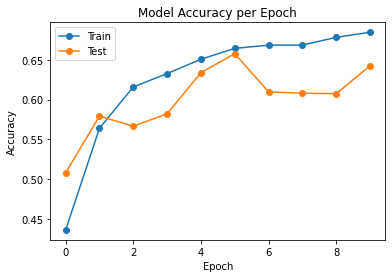

In [19]:
plt.plot(acc,marker = 'o')
plt.plot(val_acc,marker = 'o')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

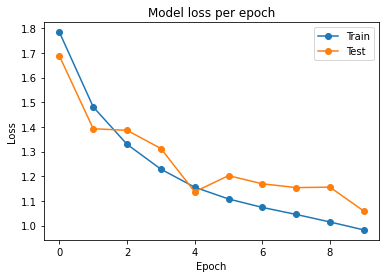

In [20]:
plt.plot(loss,marker = 'o')
plt.plot(val_loss, marker = 'o')
plt.title('Model loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [0]:
model.compile(optimizer=opt, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
history =model.fit(train_generator,epochs=2,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                   verbose=2)

Epoch 1/2
169/168 - 7547s - loss: 1.7042 - accuracy: 0.4712 - val_loss: 1.4630 - val_accuracy: 0.5819
Epoch 2/2
169/168 - 487s - loss: 1.3182 - accuracy: 0.6124 - val_loss: 1.2908 - val_accuracy: 0.6081


In [0]:
hist =model.fit(train_generator,epochs=2,
                              steps_per_epoch=100,
                              validation_data=val_generator,
                             validation_steps=50,
                              verbose=2)

In [0]:
hist =model.fit(train_generator,epochs=25,
                              steps_per_epoch=320,
                              validation_data=val_generator,
                             validation_steps=64,
                              verbose=2)

In [0]:
# model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['acc'])

In [0]:
def custom_loss(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.1)

In [0]:
model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])
#model.compile(optimizer=opt, loss=custom_loss, metrics=['accuracy'])

In [34]:
hist =model.fit(train_generator,epochs=2,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                             callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=2, min_lr=0.000001)]
                   )

Epoch 1/2
169/168 [==============================] - 487s 3s/step - loss: 1.5322 - accuracy: 0.6169 - val_loss: 1.3887 - val_accuracy: 0.6328 - lr: 0.0010
Epoch 2/2
169/168 [==============================] - 493s 3s/step - loss: 1.2236 - accuracy: 0.7096 - val_loss: 1.2804 - val_accuracy: 0.6561 - lr: 0.0010


In [0]:
loss, accuracy = model.evaluate_generator(val_generator, val_generator.n/batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

In [0]:
hist =model.fit(train_generator,epochs=15,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                             callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=2)]
                   )

In [0]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss=custom_loss, metrics=['accuracy'])

In [40]:
hist =model.fit(train_generator,epochs=2,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size)

Epoch 1/2
169/168 [==============================] - 494s 3s/step - loss: 1.1408 - accuracy: 0.7346 - val_loss: 1.2479 - val_accuracy: 0.6696
Epoch 2/2
169/168 [==============================] - 497s 3s/step - loss: 1.1277 - accuracy: 0.7424 - val_loss: 1.2428 - val_accuracy: 0.6735


In [0]:
opt = SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt, loss=custom_loss, metrics=['accuracy'])

In [43]:
hist =model.fit(train_generator,epochs=2,
                steps_per_epoch=train_generator.n/batch_size,
                validation_data=val_generator,
                validation_steps=val_generator.n/batch_size)

Epoch 1/2
169/168 [==============================] - 497s 3s/step - loss: 1.1248 - accuracy: 0.7387 - val_loss: 1.2353 - val_accuracy: 0.6787
Epoch 2/2
169/168 [==============================] - 497s 3s/step - loss: 1.1158 - accuracy: 0.7441 - val_loss: 1.2355 - val_accuracy: 0.6785


In [0]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.0001, momentum=0.9),metrics=['acc'])

In [48]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/2
100/100 - 349s - loss: 0.7592 - acc: 0.7443 - val_loss: 0.9467 - val_acc: 0.6658
Epoch 2/2
100/100 - 340s - loss: 0.7374 - acc: 0.7528 - val_loss: 0.8838 - val_acc: 0.6900


In [0]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['acc'])

In [45]:
hist =model.fit(train_generator,epochs=2,
                steps_per_epoch=train_generator.n/batch_size,
                validation_data=val_generator,
                validation_steps=val_generator.n/batch_size)

Epoch 1/2
169/168 [==============================] - 501s 3s/step - loss: 0.7748 - acc: 0.7427 - val_loss: 0.9223 - val_acc: 0.6750
Epoch 2/2
169/168 [==============================] - 493s 3s/step - loss: 0.7493 - acc: 0.7483 - val_loss: 0.9179 - val_acc: 0.6785


In [0]:
model1 =inception_resnet_v2.InceptionResNetV2(weights ='imagenet', include_top=False, input_shape = (img_shape,img_shape,3))

In [0]:
for layer in model1.layers:
    layer.trainable = False

In [81]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, 37, 37, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_406 (BatchN (None, 37, 37, 32)   96          conv2d_406[0][0]                 
__________________________________________________________________________________________________
activation_406 (Activation)     (None, 37, 37, 32)   0           batch_normalization_406[0][0]    
____________________________________________________________________________________________

In [86]:
last_layer = model1.get_layer('mixed_5b')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 320)


In [0]:
#x = model.output
#x = last_output
#x = GlobalAveragePooling2D()(x)
#x = Dense(512, activation="relu")(x)
#x = Dense(256, activation="relu")(x)
#predictions = Dense(10, activation="softmax")(x)
#modelFN = Model(inputs=model1.input, outputs=predictions)

# Flatten the output layer to 1 dimension
x = Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
#x = layers.Dense(1024, activation='relu')(last_output)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = Dense(10, activation='softmax')(x)
#x = layers.Dense(1, activation='sigmoid')(x)

# Configure the model
modelFN = Model(model1.input, x)


In [89]:
modelFN.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_609 (Conv2D)             (None, 37, 37, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_609 (BatchN (None, 37, 37, 32)   96          conv2d_609[0][0]                 
__________________________________________________________________________________________________
activation_609 (Activation)     (None, 37, 37, 32)   0           batch_normalization_609[0][0]    
____________________________________________________________________________________________

In [0]:
modelFN.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.0001, momentum=0.9),metrics=['acc'])

In [91]:
history = modelFN.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/2
100/100 - 128s - loss: 1.7727 - acc: 0.3568 - val_loss: 1.3941 - val_acc: 0.5108
Epoch 2/2
100/100 - 125s - loss: 1.3957 - acc: 0.5100 - val_loss: 1.1741 - val_acc: 0.5867
